# Домашнее задание 1 (29 + 25 + 27 + 30 = 111 pts)

## Задача 1 (29 pts)

- (3 pts) Докажите, что $\| A \|_F \le \sqrt{\mathrm{rank}(A)} \| A \|_2$.
- (3 pts) Покажите, что для любых $m, n$ и $k \le \min(m, n)$ существует $A \in \mathbb{R}^{m \times n}: \mathrm{rank}(A) = k$, такая что $\| A \|_F = \sqrt{\mathrm{rank}(A)} \| A \|_2$.
- (3 pts) Докажите, что если $\mathrm{rank}(A) = 1$, то $\| A \|_F  = \| A \|_2$.
- (3 pts) Докажите, что $\| A B \|_F \le \| A \|_2 \| B \|_F$.
- (5 pts) Для векторов важным дополнительным свойством является количество ненулевых элементов. В задаче решения недоопределённой системы линейных уравнений это свойство является одним из возможных дополнительных условий на решение. Аналогичная задача для матриц – это поиск наилучшего приближения данной матрицы с минимальным рангом. То есть аналогом разреженности для векторов является малоранговость для матриц. Возникает вопрос, какая норма является аналогичной первой векторной нормы? Ответом является так называемая ядерная норма 

$$\|A\|_{nuclear} = \sum_{i=1}^n \sigma_i, $$

где $\sigma_i$ – сингулярные числа матрицы $A$. Покажите, что это выражение действительно является нормой.

- (2 pts) Докажите, что для любой эрмитовой матрицы сингулярные числа совпадают с абсолютными значениями собственных значений. Выполнено ли это для произвольной матрицы? Докажите, что выполнено или приведите контрпример.

- (3 pts) Найдите скелетное разложение матрицы $\begin{pmatrix} 1 & -2 & 5 \\ 5 & 3 & 9 \\ 3 & 7 & -1\end{pmatrix}$.

- (1 pts) Покажите, что если матрица $A$ обратима, то $\|A^{-1}\|_F \geq \frac{\sqrt{n}}{\|A\|_F}$

- (3 pts) Рассмотрим матрицу $A = \begin{bmatrix} I & a \\ a^{\top} & 0 \end{bmatrix}$. Когда она является обратимой? Пусть она обратима, тогда найдите выражение для $A^{-1}$

- (3 pts) Пусть матрица $A$ ортогональна и все её элементы неотрицательны, то есть $a_{ij} \geq 0$. Покажите, что тогда $A$ есть матрица перестановки  

## Задача 2. LU разложение (25 pts)

### 1. LU разложение для ленточных матриц 

Сложность вычисления LU разложения для матрицы размера $n\times n$ – $\mathcal{O}(n^3)$.
Существенного уменьшения сложности можно добиться для матриц определённой структуры, например разреженных. 
В этой задаче рассмотрим специальный класс разреженных матриц, а именно ленточные матрицы с шириной ленты 3 и 5, которые называются трёхдиагональными и пятидиагональными, соответственно.

- (5 pts) Реализуйте функцию ```band_lu(diag_broadcast, n)```, которая вычисляет LU разложение для пяти- или трёхдиагональной матрицы, на основании данных значений на диагоналях. Предполагается, что на главной диагонали фактора ```L``` стоят 1.
Например, входные параметры ```(diag_broadcast = [3,-5,4], n = 4)``` означают, что необходимо найти LU разложение для трёхдиагональной матрицы вида:

$$A = \begin{pmatrix}
-5 & 4 & 0 & 0\\
3 & -5 & 4 & 0 \\
0 & 3 & -5 & 4 \\
0 & 0 & 3 & -5 \\
\end{pmatrix}.$$

Функция должна возвращать двумерные NumPy массивы ```L``` и ```U```, в которых хранятся диагонали факторов. Например, ```L[0]``` содержит первую под-диагональ (поскольку на главной диагонали стоят 1, то её возвращать не нужно), ```L[1]``` – вторую под-диагональ и т.д.), аналогично для $U$ (```U[:,0]``` содержит главную диагональ, ```U[:,1]``` содержит первую над-диагональ и т.д.). Прототип функции приведён ниже и не должен меняться.
- (2 pts) Сравните время вычисления LU разложения с помощью стандартной функции в ```scipy```, которая ничего не знает о структуре матрицы, и вашей реализацией LU разложения для ленточной матрицы. Объясните результат. Постройте график зависимости времени факторизации от размерности факторизуемой матрицы. Выберите интервал размерностей факторизуемой матрицы так, чтобы динамика зависимости времени от размерности была различима. При необходимости используйте логарифмический масштаб по оси ```y```.

In [ ]:
# INPUT : diag_broadcast - list of diagonals value to broadcast, length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.
def band_lu(diag_broadcast, n):
    # enter your code

### 2. Устойчивость LU разложения 

Рассмотрим матрицу вида
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Вычислите аналитически LU разложение с и без выбора ведущего элемента в строке.
* (3 pts) Объясните, почему алгоритм вычисления LU разложения плохо аппроксимирует факторы $L$ и $U$ для $|\varepsilon|\ll 1$ в машинной арифметике?

### 3. Блочное LU разложение

Пусть $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ – блочная матрица. Необходимо решить систему линейных уравнений вида

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Используя процедуру блочного исключения, найдите матрицу $S$ и правую часть $\hat{f_2}$ такую что $u_2$ может быть найден из системы $S u_2 = \hat{f_2}$. Матрица $S$ называется <font color='red'> дополнением по Шуру </font> блока  $A_{11}$.
* (4 pts) Используя свойства дополнения по Шуру докажите, что

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


где $X$ невырожденная квадратная матрица.
* (4 pts) Пусть матрица $F \in \mathbb{R}^{m \times n}$ и $G \in \mathbb{R}^{n \times m}$. Докажите, что 

$$\det(I_m - FG) = \det(I_n - GF).$$

## Задача 3:  QR разложение (27 pts)

- (5 pts) Реализуйте метод Грама-Шмидта для вычисления QR разложения. На вход подаётся прямоугольная матрица, функция возвращает матрицы ```Q``` и ```R``` из QR разложения. Прототип приведён ниже и не должен изменяться 

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A = QR
def gram_schmidt_qr(A):
    # your code is here
    return Q, R

- (5 pts) Реализуйте модифицированный метод Грама-Шмидта для вычисления QR разложения. На вход подаётся прямоугольная матрица, функция возвращает матрицы Q и R из QR разложения. Прототип приведён ниже и не должен изменяться

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A = QR
def modified_gram_schmidt_qr(A): # 5 pts
    # your code is here
    return Q, R

- (7 pts) Реализуйте алгоритм вычисления QR разложения, основанный на преобразованиях Хаусхолдера. На вход подаётся прямоугольная матрица, функция возвращает матрицы Q и R из QR разложения. Прототип приведён ниже и не должен изменяться. Обратите внимание на эффективность реализации операции умножения матриц Хаусхолдера для получения матрицы ```Q```.

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A=QR
def householder_qr(A): # 7 pts
    # your code is here
    return Q, R

- (2 pts) Сгенерируйте квадратную [матрицу Вандермонда](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V\in\mathbb{R}^{n\times n},\ n = 20$ для вектора $x$: ```x = np.linspace(0,1,n)``` и вычислите QR разложение этой матрицы с помощью каждого из трёх реализованных вами алгоритмов. Вычислите насколько столбцы матрицы $Q$ ортогональны, то есть величину $\|Q^{\top}Q - I\|_2$. Объясните полученный результат.

- (3 pts) Изучите как скорость работы каждого из алгоритмов вычисления QR разложения зависит от числа строк и столбцов матрицы, для которой вычисляется QR разложение. Постройте два графика: на одном покажите зависимость времени вычисления от числа строк при фиксированном числе столбцов, а на другом, наоборот, зависимость времени вычисления от числа столбцов при неизменном числе строк. Выберите диапазоны изменения количества строк и столбцов такими, чтобы можно было увидеть асимптотическую скорость работы для больших матриц. 

- (5 pts) Пусть дано QR разложение матрицы $A$ размера $m \times n, \; m > n$. К матрице $A$ добавили ещё одну строку после последней, то есть теперь есть матрица $\hat{A} = \begin{bmatrix} A \\ a \end{bmatrix}$ размера $(m+1) \times n$. Покажите, как найти QR разложение матрицы $\hat{A}$, используя QR разложения матрицы $A$. Сравните асимптотические сложности предложенного вами способа и метода, который не использует QR разложение матрицы $A$. Также экспериментально покажите, как время работы этих двух методов зависит от размерности по числу строк и столбцов матрицы.

## Задача 4. Сжатие полносвязных слоёв в нейросети (30 pts)

В этой задаче вам предлагается исследовать, как изменится точность предсказания нейросети, которая классифицирует изображения, если вместо полносвязных слоёв использовать их сжатое представление, полученное с помощью SVD. Результатом решения этой задачи должен быть график зависимости точности классификации на тестовой выборке от количества параметров нейронной сети.

#### Сначала скачаем данные CIFAR10

In [84]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./', train=True, download=True, transform=transform), 
                                        batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./', train=False, transform=transform), 
                                          batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### Посмотрим, как выглядят изображения

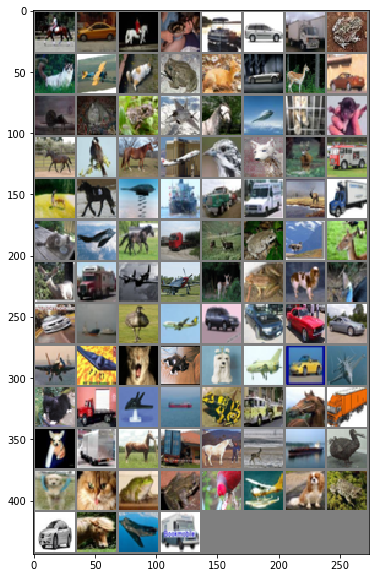

horse   car horse   cat  ship   car truck  frog


In [89]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


### Архитектура нейронной сети

Для простоты и демонстрации принципа сжатия слоёв нейронных сетей рассмотрим архитектуру, состоящую только из полносвязных слоёв (то есть линейных преобразований) и стандартных ReLU-нелинейностей. Опять же для наглядности выбрали размерность 1000 для полносвязных слоёв. 

In [90]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1000)
        self.fc4 = nn.Linear(1000, 1000)
        self.fc5 = nn.Linear(1000, 1000)
        self.fc6 = nn.Linear(1000, 10)
        self.ReLU = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x.view(-1, 3 * 32*32))
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.fc3(x)
        x = self.ReLU(x)
        x = self.fc4(x)
        x = self.ReLU(x)
        x = self.fc5(x)
        x = self.ReLU(x)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

#### Функции для обучения и тестирования результата после каждого прохождения всех данных 

In [91]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [92]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

### Зададим параметры обучения и вывода промежуточных результатов

In [93]:
log_interval = 50
epochs = 7

### Запускаем обучение с помощью метода оптимизации [Adam](https://arxiv.org/pdf/1412.6980.pdf%20%22%20entire%20document) 
Если у вас не очень мощный ноутбук, то придётся подождать некоторое время. 

In [94]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, epochs + 1):
    train(model,  train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303912
Train Epoch: 1 [5000/50000 (10%)]	Loss: 1.987689
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.877347
Train Epoch: 1 [15000/50000 (30%)]	Loss: 2.018195
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.525423
Train Epoch: 1 [25000/50000 (50%)]	Loss: 1.779230
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.547251
Train Epoch: 1 [35000/50000 (70%)]	Loss: 1.603937
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.575551
Train Epoch: 1 [45000/50000 (90%)]	Loss: 1.565285

Test set: Average loss: 1.5938, Accuracy: 4327/10000 (43%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.427085
Train Epoch: 2 [5000/50000 (10%)]	Loss: 1.645997
Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.492367
Train Epoch: 2 [15000/50000 (30%)]	Loss: 1.503690
Train Epoch: 2 [20000/50000 (40%)]	Loss: 1.467856
Train Epoch: 2 [25000/50000 (50%)]	Loss: 1.201816
Train Epoch: 2 [30000/50000 (60%)]	Loss: 1.461097
Train Epoch: 2 [35000/50000 (70%)]	Loss: 1.468568
Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.515223
T

- (3 pts) Вычислите SVD для матрицы $1000 \times 1000$, которая соответствует любому слою подходящего размера обученной нейросети. Покажите на графике убывание сингулярных чисел. Какой вывод можно сделать?
- (12 pts) Создайте модель (аналогично классу ```Net```), которая на вход будет принимать экземпляр класса ```Net``` и ранг $r > 0$. Эта модель должна сжимать все полносвязные слои с помощью SVD разложения, из которого берутся только первые $r$ компонент. Также функция ```forward``` должна быть эффективно реализована с использованием сжатого представления полносвязных слоёв, а в остальном полностью повторять эту же функцию для несжатой обученной сети.
- (5 pts) Постройте зависимость точности предсказания на тестовой выборе от количества параметров, которое необходимо для этого. Это количество, очевидно, некоторым образом зависит от заданного ранга сжатия $r$. Также постройте зависимость времени вычисления от ранга сжатия. Объясните полученные результаты. Для вычисления времени используйте [%timeit](https://docs.python.org/3.6/library/timeit.html) c необходимыми параметрами (примеры смотрите в лекции) 

### Fine-tuning

- (10 pts) Поскольку в вашей модели, которая использует сжатое представление линейных слоёв, параметрами являются матрицы, полученные из SVD соответствующих линейных слоёв, то их также можно оптимизировать. Эта процедура называется fine-tuning. Предлагается провести обучение этих матриц в течение нескольких эпох (от 1 до 5 будет достаточно) и сравнить насколько выросло качество по сравнению с первоначальными значениями. Покажите значения точности на тестовой выборки и объясните полученные результаты.